In [1]:
from pycaret.time_series import *


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
usecols = ['game_id', 'user_id', 'bet_id', 'game_type', 'odds', 'fiat_bet_amount',
       'fiat_profit_amount','fiat_is_valuable']


In [ ]:
bets = pd.read_csv("data/bets.csv", usecols=usecols)


In [5]:
bets.head()


,game_id,user_id,bet_id,game_type,odds,fiat_is_valuable,fiat_bet_amount,fiat_profit_amount
0,2828375,173570,210854317,normal,0.0,t,0.048738,-0.048738
1,2828375,1339924,12148553,yellow,0.0,f,NaN,NaN
2,2828375,1139219,210854260,normal,2.0,t,0.000088,0.000088
3,2828375,1329183,12148544,yellow,0.0,t,0.188109,-0.188109
4,2828375,1378328,210854292,normal,0.0,t,0.000005,-0.000005


In [76]:
usecols = ['game_id', 'max_rate', 'total_bet_amount', 'total_win_amount',
       'total_profit_amount','player_count','bet_count','timestamp']

games = pd.read_csv("data/games.csv", usecols=usecols)
 

In [77]:

games.head()


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,6.43,15.696372,26.377635,10.681263,206,217,1599622213
1,2828376,2.10,69.101741,71.544642,2.442901,294,314,1599622213
2,2828377,3.11,41.762966,32.070902,-9.692064,289,306,1599622213
3,2828378,24.97,73.392453,110.032057,36.639604,281,299,1599622213
4,2828379,1.04,58.377711,71.760673,13.382962,281,297,1599622213


In [8]:
df = pd.merge(bets, games, on='game_id', how='left')


In [9]:
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_is_valuable,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,173570,210854317,normal,0.0,t,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213
1,2828375,1339924,12148553,yellow,0.0,f,NaN,NaN,6.43,15.696372,26.377635,10.681263,206,217,1599622213
2,2828375,1139219,210854260,normal,2.0,t,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213
3,2828375,1329183,12148544,yellow,0.0,t,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213
4,2828375,1378328,210854292,normal,0.0,t,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213


In [10]:
total_profit_amount = games['total_profit_amount'].sum()
total_profit_amount


-168338.77059541445

In [11]:
df['user_id'].nunique()


50039

In [12]:
# df['date'].min(), df['date'].max()


In [13]:
df = df[df['fiat_is_valuable'] == 't']
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_is_valuable,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,173570,210854317,normal,0.0,t,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213
2,2828375,1139219,210854260,normal,2.0,t,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213
3,2828375,1329183,12148544,yellow,0.0,t,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213
4,2828375,1378328,210854292,normal,0.0,t,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213
5,2828375,1420292,210854342,normal,3.0,t,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213


In [14]:
df.columns


Index(['game_id', 'user_id', 'bet_id', 'game_type', 'odds', 'fiat_is_valuable',
       'fiat_bet_amount', 'fiat_profit_amount', 'max_rate', 'total_bet_amount',
       'total_win_amount', 'total_profit_amount', 'player_count', 'bet_count',
       'timestamp'],
      dtype='object')

In [15]:
df = df.drop(columns=['fiat_is_valuable'])


In [16]:
df.columns


Index(['game_id', 'user_id', 'bet_id', 'game_type', 'odds', 'fiat_bet_amount',
       'fiat_profit_amount', 'max_rate', 'total_bet_amount',
       'total_win_amount', 'total_profit_amount', 'player_count', 'bet_count',
       'timestamp'],
      dtype='object')

In [17]:
df.head(20)


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,173570,210854317,normal,0.00,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213
2,2828375,1139219,210854260,normal,2.00,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213
3,2828375,1329183,12148544,yellow,0.00,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213
4,2828375,1378328,210854292,normal,0.00,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213
5,2828375,1420292,210854342,normal,3.00,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213
6,2828375,1205760,12148533,red,0.00,0.000176,-0.000176,6.43,15.696372,26.377635,10.681263,206,217,1599622213
7,2828375,1335815,210854336,normal,2.00,0.000008,0.000008,6.43,15.696372,26.377635,10.681263,206,217,1599622213
8,2828375,1189902,210854446,normal,5.00,0.000283,0.001131,6.43,15.696372,26.377635,10.681263,206,217,1599622213
9,2828375,1378313,210854326,normal,2.00,0.000301,0.000301,6.43,15.696372,26.377635,10.681263,206,217,1599622213
10,2828375,1287181,210854358,normal,2.00,0.000019,0.000019,6.43,15.696372,26.377635,10.681263,206,217,1599622213


In [18]:
df['game_type'].value_counts()


game_type
normal    20495283
red        1285552
green      1273361
yellow      281728
Name: count, dtype: int64

In [19]:
df['saldo'] = df.groupby('user_id')['fiat_profit_amount'].cumsum()
df['n_aposta'] = df.groupby('user_id').cumcount() + 1


In [20]:
# df[df['game_type']=='red'].sort_values('odds')

#green - 2
#yellow - 10


In [21]:
conditions = [
    (df['game_type'] == 'normal') & (df['odds'] == 0),
    (df['game_type'] == 'green'),
    (df['game_type'] == 'red'),
    (df['game_type'] == 'yellow')
]

values = [
    df['max_rate'],
    2,
    1.96,
    10
]

df['odds_adjusted'] = np.select(conditions, values, default=df['odds'])


In [22]:
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted
0,2828375,173570,210854317,normal,0.0,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.048738,1,6.43
2,2828375,1139219,210854260,normal,2.0,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000088,1,2.00
3,2828375,1329183,12148544,yellow,0.0,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.188109,1,10.00
4,2828375,1378328,210854292,normal,0.0,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.000005,1,6.43
5,2828375,1420292,210854342,normal,3.0,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000213,1,3.00


In [23]:
df_small = df[['user_id','odds_adjusted','game_id','saldo']].copy()
out = (
    df_small.groupby('user_id', sort=False)
            .agg(avg_odds=('odds_adjusted','mean'),
                 game_count=('game_id','nunique'),
                 saldo=('saldo','sum'))
            .reset_index()
)


In [24]:
out.sort_values('game_count')


,user_id,avg_odds,game_count,saldo
27682,1490486,2.000000,1,-2.343409e-03
26846,988768,1.110000,1,-1.606678e-02
21023,1467136,1.400000,1,-3.854721e-02
29938,937186,1.380000,1,-2.652593e-06
12087,1242936,3.430000,1,-9.402638e-04
...,...,...,...,...
1781,1262559,2.088817,70821,4.540944e+02
78,1397958,1.739905,71126,8.070242e+06
93,1012475,1.184253,71166,3.030474e+04
125,1192777,1.706179,71245,1.695102e+07


In [25]:
out[out['game_count']>500].iloc[:10]#.sort_values('avg_odds')


,user_id,avg_odds,game_count,saldo
1,1139219,2.438726,19925,-4.710498e+03
2,1329183,7.751896,14977,-6.396536e+06
3,1378328,3.067125,61250,8.415041e+05
4,1420292,1.773861,27449,-1.210737e+04
5,1205760,1.703507,70287,5.526187e+06
7,1189902,2.546961,32619,4.407958e+05
8,1378313,1.684317,19739,7.417770e+03
9,1287181,1.682927,20256,1.344363e+02
10,1240626,1.534766,64037,6.605874e+04
11,1304626,1.683128,69696,3.962178e+06


In [26]:
df[df['user_id'] == 901507]


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted
164,2828375,901507,210854399,normal,5.00,0.050023,0.200092,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.200092,1,5.00
165,2828375,901507,12148560,red,0.00,0.010003,-0.010003,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.190089,2,1.96
449,2828376,901507,210854688,normal,0.00,0.025007,-0.025007,2.10,69.101741,71.544642,2.442901,294,314,1599622213,0.165082,3,2.10
450,2828376,901507,12148587,red,0.00,0.020606,-0.020606,2.10,69.101741,71.544642,2.442901,294,314,1599622213,0.144476,4,1.96
756,2828377,901507,210855002,normal,0.00,0.031509,-0.031509,3.11,41.762966,32.070902,-9.692064,289,306,1599622213,0.112967,5,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25699367,2899997,901507,15091814,red,0.00,0.000046,-0.000046,2.51,212.218466,341.837748,129.619282,381,400,1601438402,144.120880,124142,1.96
25699751,2899998,901507,237080841,normal,0.00,0.018754,-0.018754,1.07,82.275220,16.021457,-66.253763,364,381,1601438402,144.102126,124143,1.07
25699752,2899998,901507,15091855,red,1.96,0.000094,0.000090,1.07,82.275220,16.021457,-66.253763,364,381,1601438402,144.102216,124144,1.96
25700130,2899999,901507,237081127,normal,0.00,0.023630,-0.023630,2.78,202.829346,294.151088,91.321742,367,384,1601438402,144.078586,124145,2.78


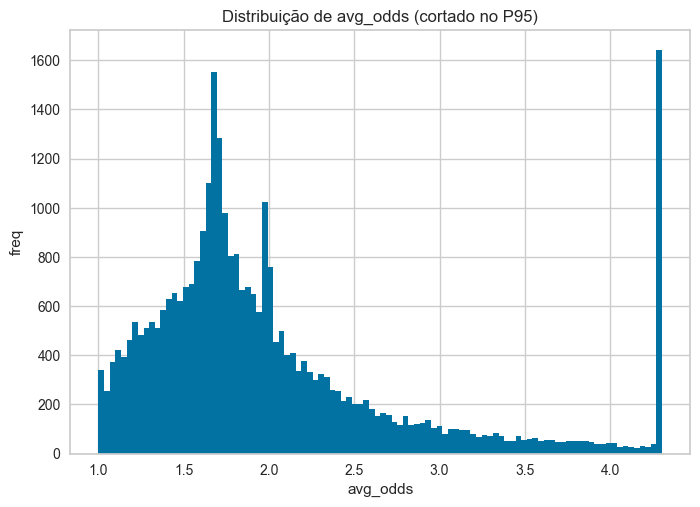

In [103]:
p99 = out['avg_odds'].quantile(0.95)

out['avg_odds'].clip(upper=p99).hist(bins=100)
plt.title('Distribuição de avg_odds (cortado no P95)')
plt.xlabel('avg_odds')
plt.ylabel('freq')
plt.show()


In [28]:
df[df['user_id'] == 1192777].iloc[124465:124510]


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted
22891959,2892572,1192777,14801125,red,0.00,0.005870,-0.005870,3.30,88.046434,159.129896,71.083462,336,353,1601265603,315.028348,124466,1.96
22892339,2892573,1192777,234254267,normal,0.00,0.001796,-0.001796,1.19,107.938929,1.547741,-106.391188,372,393,1601265603,315.026552,124467,1.19
22892340,2892573,1192777,14801159,red,1.96,0.011741,0.011271,1.19,107.938929,1.547741,-106.391188,372,393,1601265603,315.037823,124468,1.96
22892734,2892574,1192777,234254564,normal,1.38,0.004761,0.001809,2.28,108.528022,168.523622,59.995600,374,394,1601265603,315.039632,124469,1.38
22892735,2892574,1192777,14801196,red,0.00,0.005870,-0.005870,2.28,108.528022,168.523622,59.995600,374,394,1601265603,315.033761,124470,1.96
22893123,2892575,1192777,234255149,normal,0.00,0.001796,-0.001796,1.47,76.302836,20.469621,-55.833215,369,387,1601265603,315.031965,124471,1.47
22893124,2892575,1192777,14801238,red,1.96,0.011741,0.011271,1.47,76.302836,20.469621,-55.833215,369,387,1601265603,315.043236,124472,1.96
22893515,2892576,1192777,234255389,normal,1.38,0.004761,0.001809,4.32,162.168325,307.953632,145.785307,380,401,1601265603,315.045045,124473,1.38
22893516,2892576,1192777,14801279,red,0.00,0.005870,-0.005870,4.32,162.168325,307.953632,145.785307,380,401,1601265603,315.039175,124474,1.96
22893908,2892577,1192777,234255871,normal,2.00,0.001796,0.001796,2.63,73.600531,113.000254,39.399724,367,384,1601265603,315.040971,124475,2.00


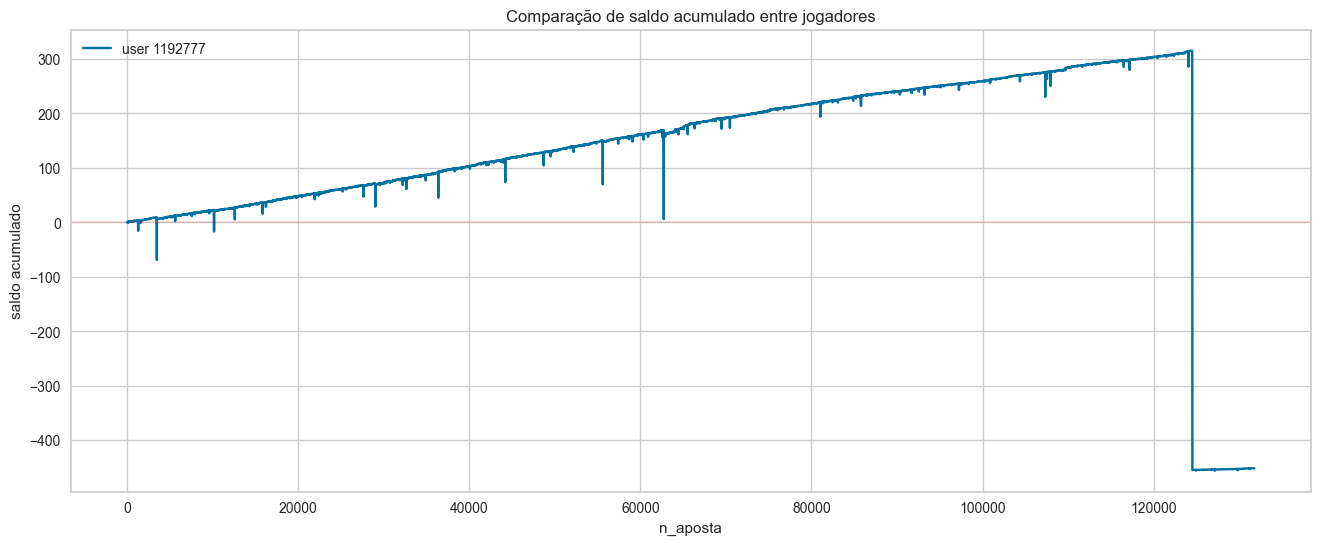

In [29]:
fig = plt.figure(figsize=(16, 6))

top_users = [1192777]  # 942021 substitui pelos que quer comparar
for uid in top_users:
    u = df[df['user_id'] == uid]#.iloc[124495:124508]
    plt.plot(u['n_aposta'], u['saldo'], label=f'user {uid}')

plt.legend()
plt.xlabel('n_aposta')
plt.ylabel('saldo acumulado')
plt.title('Comparação de saldo acumulado entre jogadores')
plt.axhline(y=0, color='red', linewidth=0.2,linestyle='--')
plt.grid(True)
plt.show()


In [30]:
out[out['game_count']>10000].sort_values('avg_odds')


,user_id,avg_odds,game_count,saldo
24644,1478867,1.010939,10978,-1.762095e+02
1276,1263815,1.057500,25430,1.311955e+04
139,1266074,1.058545,48758,6.294866e+05
16823,1452879,1.062522,23173,-2.041908e+06
9277,1192259,1.093932,55949,2.805514e+05
...,...,...,...,...
3139,721065,6.089503,17182,-6.046301e+06
3723,1398661,6.263979,20997,-2.056808e+02
97,1324816,7.393204,25710,-8.449622e+02
2,1329183,7.751896,14977,-6.396536e+06


In [31]:
bins   = [1, 1.20, 1.50, 1.80, 2, 2.5, 3, 3.5, 4, 5, np.inf]
labels = ['<1.2', '1.2–<1.5', '1.5–<1.8', '1.8–<2', '2–<2.5', '2.5–<3', '3–<3.5', '3.5–<4', '4–<5', '≥5']


In [32]:

df_user = out.copy()
df_user['avg_odds_bucket'] = pd.cut(df_user['avg_odds'], bins=bins, labels=labels, right=False)


In [33]:
df_user


,user_id,avg_odds,game_count,saldo,avg_odds_bucket
0,173570,3.762151,372,-3.623565e+02,3.5–<4
1,1139219,2.438726,19925,-4.710498e+03,2–<2.5
2,1329183,7.751896,14977,-6.396536e+06,≥5
3,1378328,3.067125,61250,8.415041e+05,3–<3.5
4,1420292,1.773861,27449,-1.210737e+04,1.5–<1.8
...,...,...,...,...,...
32097,1503516,1.526667,3,-2.410668e-01,1.5–<1.8
32098,1503513,1.218333,6,-3.961698e-02,1.2–<1.5
32099,1503542,1.180000,1,-7.415434e-02,<1.2
32100,1503546,1.270000,1,-1.335507e-03,1.2–<1.5


In [34]:
saldo_por_bucket = (
    df_user.groupby('avg_odds_bucket')
           .agg(total_saldo=('saldo','sum'),
                users=('user_id','nunique'),
                mean_avg_odds=('avg_odds','mean'),
                mean_game_count=('game_count','mean'))
           .reset_index()
)


In [35]:
saldo_por_bucket


,avg_odds_bucket,total_saldo,users,mean_avg_odds,mean_game_count
0,<1.2,-3.124409e+06,2253,1.107544,385.260542
1,1.2–<1.5,-1.768866e+07,5117,1.357179,404.150479
2,1.5–<1.8,1.189117e+07,8843,1.659611,1043.366391
3,1.8–<2,1.522479e+08,4445,1.901842,749.348931
4,2–<2.5,1.057066e+08,5348,2.205658,632.889491
5,2.5–<3,1.700051e+08,2245,2.720416,449.974165
6,3–<3.5,-2.355092e+07,1190,3.223184,765.540336
7,3.5–<4,-1.134371e+07,756,3.734175,590.902116
8,4–<5,7.068567e+06,766,4.433448,425.954308
9,≥5,-9.463793e+06,1139,9.535820,269.114135


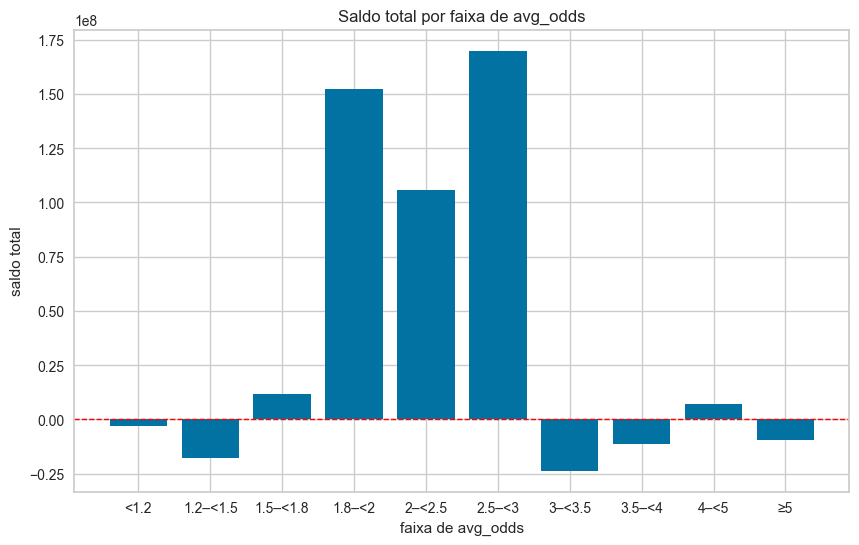

In [36]:
fig = plt.figure(figsize=(10, 6))
plt.bar(saldo_por_bucket['avg_odds_bucket'], saldo_por_bucket['total_saldo'])
plt.title('Saldo total por faixa de avg_odds')
plt.xlabel('faixa de avg_odds')
plt.ylabel('saldo total')
plt.axhline(y=0, color='red', linewidth=1,linestyle='--')
plt.show()


In [78]:
games_df = games.copy()


In [79]:
games_df['avg_bet_amount'] = games_df['total_bet_amount'] / games_df['player_count']


In [81]:
games_df.describe()


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,avg_bet_amount
count,7.162500e+04,71625.000000,71625.000000,71625.000000,71625.000000,71625.000000,71625.000000,7.162500e+04,71505.000000
mean,2.864187e+06,11.340412,157.038384,154.688104,-2.350280,337.916342,358.816265,1.600499e+09,0.451505
std,2.067650e+04,246.945456,330.138567,489.732506,384.203693,40.665719,43.372689,5.325096e+05,0.906561
min,2.828375e+06,1.000000,0.000000,0.000000,-14957.508233,0.000000,0.000000,1.599622e+09,0.000000
25%,2.846281e+06,1.310000,48.396370,14.209756,-55.719407,315.000000,334.000000,1.600056e+09,0.147511
50%,2.864187e+06,1.990000,83.022545,50.352123,-8.755664,340.000000,361.000000,1.600488e+09,0.245792
75%,2.882093e+06,3.980000,151.108175,143.516115,47.262142,363.000000,386.000000,1.600920e+09,0.439648
max,2.899999e+06,33617.440000,14971.851192,29881.809556,24308.751294,463.000000,502.000000,1.601438e+09,42.174229


In [82]:
med_per_game = (
    df.groupby('game_id', sort=False)['fiat_bet_amount']
      .median()
      .rename('median_bet_amount')
)
med_per_game


game_id
2828375    0.000151
2828376    0.000090
2828377    0.000088
2828378    0.000085
2828379    0.000085
             ...   
2899995    0.000305
2899996    0.000200
2899997    0.000400
2899999    0.000445
2899998    0.000200
Name: median_bet_amount, Length: 71499, dtype: float64

In [85]:
df[df['game_id']==2828375].describe()


,game_id,user_id,bet_id,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted
count,196.0,1.960000e+02,1.960000e+02,196.000000,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,196.000000,196.000000,196.0,196.0,1.960000e+02,1.960000e+02,196.000000,196.000000
mean,2828375.0,1.089927e+06,1.794264e+08,1.724439,8.008353e-02,5.449624e-02,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,5.557488e-02,1.051020,2.666224
std,0.0,4.029342e+05,7.269224e+07,1.155678,6.142424e-01,6.171074e-01,8.904529e-16,3.561812e-15,0.000000,0.000000,0.0,0.0,0.000000e+00,6.171607e-01,0.220603,1.785957
min,2828375.0,5.554100e+04,1.214853e+07,0.000000,1.568393e-12,-2.000556e+00,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,-2.000556e+00,1.000000,1.010000
25%,2828375.0,1.015448e+06,2.108543e+08,1.195000,8.475740e-06,5.458748e-08,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,5.392520e-07,1.000000,1.960000
50%,2828375.0,1.264181e+06,2.108543e+08,2.000000,1.511135e-04,2.831453e-05,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,4.107785e-05,1.000000,2.000000
75%,2828375.0,1.370827e+06,2.108544e+08,2.000000,6.169093e-03,2.261179e-03,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,2.281004e-03,1.000000,2.375000
max,2828375.0,1.431714e+06,2.108545e+08,6.000000,8.287556e+00,8.287556e+00,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,8.287556e+00,2.000000,10.000000


In [87]:
games_df = games_df.join(med_per_game, on='game_id')


In [88]:
games_df


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,avg_bet_amount,median_bet_amount
0,2828375,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.076196,0.000151
1,2828376,2.10,69.101741,71.544642,2.442901,294,314,1599622213,0.235040,0.000090
2,2828377,3.11,41.762966,32.070902,-9.692064,289,306,1599622213,0.144509,0.000088
3,2828378,24.97,73.392453,110.032057,36.639604,281,299,1599622213,0.261183,0.000085
4,2828379,1.04,58.377711,71.760673,13.382962,281,297,1599622213,0.207750,0.000085
...,...,...,...,...,...,...,...,...,...,...
71620,2899995,2.04,150.967822,108.736242,-42.231580,381,400,1601438402,0.396241,0.000305
71621,2899996,1.27,80.657169,9.038559,-71.618610,371,386,1601438402,0.217405,0.000200
71622,2899997,2.51,212.218466,341.837748,129.619282,381,400,1601438402,0.557004,0.000400
71623,2899998,1.07,82.275220,16.021457,-66.253763,364,381,1601438402,0.226031,0.000200


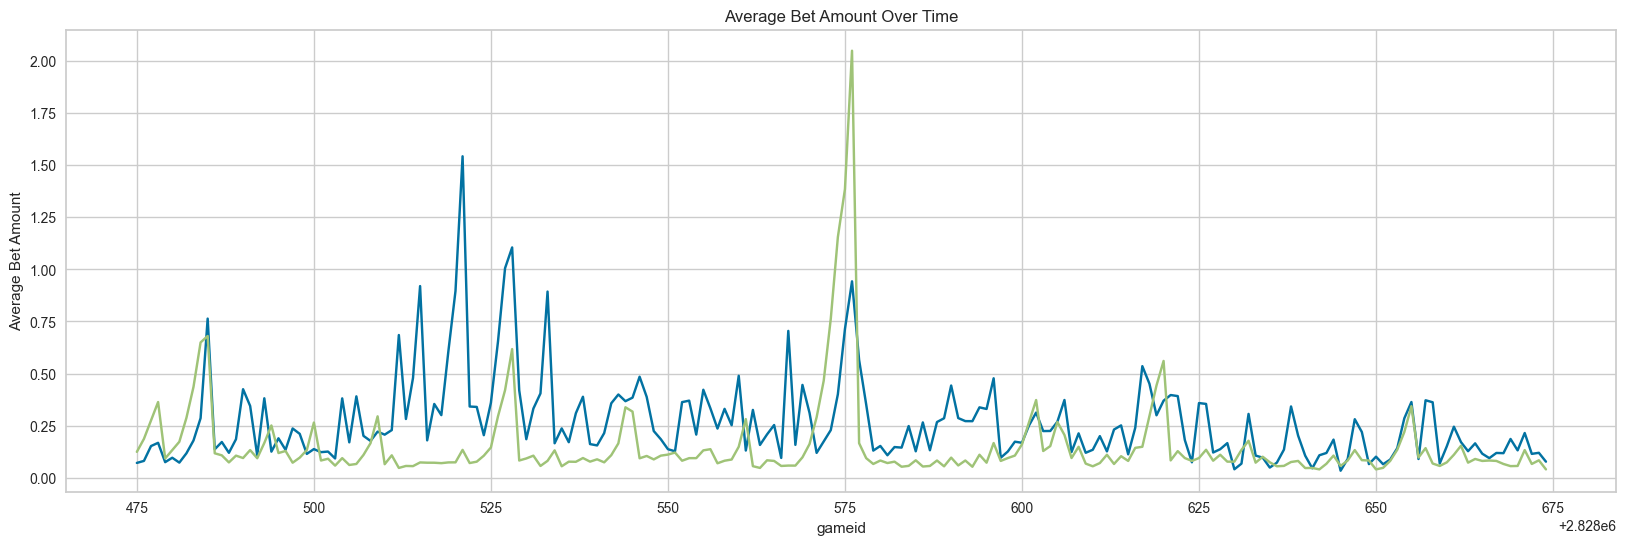

In [96]:
fig = plt.figure(figsize=(20, 6))
amostra = games_df[100:300]
plt.plot(amostra['game_id'], amostra['avg_bet_amount'])
plt.plot(amostra['game_id'], amostra['median_bet_amount']*1000)
plt.title('Average Bet Amount Over Time')
plt.xlabel('gameid')
plt.ylabel('Average Bet Amount')
plt.show()


In [102]:
games[197:205]


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
197,2828572,1.29,53.940816,2.394448,-51.546368,309,330,1599624003
198,2828573,1.52,68.493685,3.999590,-64.494095,299,320,1599624003
199,2828574,1.93,121.459130,54.588586,-66.870544,303,325,1599624003
200,2828575,1.17,220.604762,7.394015,-213.210747,309,331,1599624003
201,2828576,2.01,289.370222,459.799789,170.429567,307,328,1599624003
202,2828577,84.58,170.282592,370.620139,200.337547,301,319,1599624003
203,2828578,6.04,108.021232,226.927129,118.905898,307,325,1599624003
204,2828579,1.36,39.577055,4.952831,-34.624225,303,324,1599624003
